In [153]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [154]:
df = pd.read_csv('HR_comma_sep.csv')

In [155]:
df.head(6)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


In [156]:
df.shape

(14999, 10)

In [157]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [158]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [159]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [160]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

<AxesSubplot:xlabel='Work_accident'>

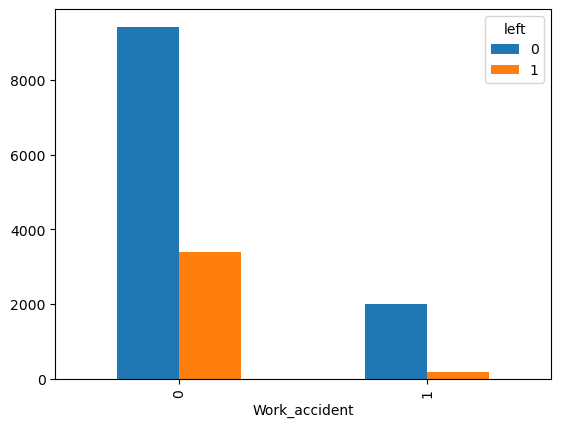

In [161]:
pd.crosstab(df.Work_accident,df.left).plot(kind='bar')

In [162]:
df.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [163]:
subdf = df[['satisfaction_level','average_montly_hours','Work_accident','promotion_last_5years','salary']]
subdf.head(6) 

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary
0,0.38,157,0,0,low
1,0.80,262,0,0,medium
2,0.11,272,0,0,medium
3,0.72,223,0,0,low
4,0.37,159,0,0,low
5,0.41,153,0,0,low


In [164]:
sal_dummies = pd.get_dummies(subdf.salary)
sal_dummies.head(6)

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
5,0,1,0


In [165]:
df_with_dummies = pd.concat([subdf,sal_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,0,low,0,1,0
1,0.80,262,0,0,medium,0,0,1
2,0.11,272,0,0,medium,0,0,1
3,0.72,223,0,0,low,0,1,0
4,0.37,159,0,0,low,0,1,0


In [166]:
df_with_dummies.drop('salary',axis='columns',inplace=True)

In [167]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,high,low,medium
0,0.38,157,0,0,0,1,0
1,0.80,262,0,0,0,0,1
2,0.11,272,0,0,0,0,1
3,0.72,223,0,0,0,1,0
4,0.37,159,0,0,0,1,0


In [168]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,high,low,medium
0,0.38,157,0,0,0,1,0
1,0.80,262,0,0,0,0,1
2,0.11,272,0,0,0,0,1
3,0.72,223,0,0,0,1,0
4,0.37,159,0,0,0,1,0


In [169]:
y = df.left

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [171]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [172]:
model.fit(X_train,y_train)

c:\Users\MOHIT RANJAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [173]:
model.score(X,y)

0.776651776785119

In [174]:
X

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,high,low,medium
0,0.38,157,0,0,0,1,0
1,0.80,262,0,0,0,0,1
2,0.11,272,0,0,0,0,1
3,0.72,223,0,0,0,1,0
4,0.37,159,0,0,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,0,0,1,0
14995,0.37,160,0,0,0,1,0
14996,0.37,143,0,0,0,1,0
14997,0.11,280,0,0,0,1,0


In [179]:
employee_feature = [
    [0.38, 157,0, 0, 0, 1, 0],  # Employee 0 features
    [0.80, 262,0, 0, 0, 0, 1],  # Employee 1 features
    [0.11, 272,0, 0, 0, 0, 1]
]
predictions = model.predict(employee_feature)
predictions

for i,prediction in enumerate(predictions):
    if prediction == 1:
        print(f"Employee {i} is predicted to leave the company")
    else:
        print(f"Employee {i} is predicted not to leave the company")

Employee 0 is predicted not to leave the company
Employee 1 is predicted not to leave the company
Employee 2 is predicted to leave the company


c:\Users\MOHIT RANJAN\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
